# Lecture 2 #

Sympy allows us to specify what format the answer should be output. Here are some additional functions and simplifications:

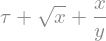

In [4]:
import sympy as sym
#We can call this function to give nice outputs
sym.init_printing()

#We can also use words to get greek symbols!
x,y,tau = sym.symbols('x y tau')
#Only the most recent statement will be shown. If you use a print statement, the format will not be nice
x/y + sym.sqrt(x) + tau

The simplify function is a catch all for most simplification, but it is slow

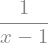

In [59]:
x,y,z,n = sym.symbols('x y z n')

expr = (x**2 - 2*x + 1) / ((x-1)**3)
#The simplify function simplifies, but is slow and might not give the right form of the expression
sym.simplify(expr)

We can collect the same power of $x$, which i often helpful when an expression contains arbitrary constants and variables.

In [23]:
#Collect combines like powers
expr = x**2 - z*x**2 + 2*x - 2*y*x + 3
#Combine all powers of x
sym.collect(expr,x)

We can do partial fraction decomposition!

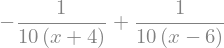

In [29]:
#Apart does partial fraction decomposition
expr = 1/(x**2 - 2*x - 24)
sym.apart(expr)

Sympy also has trig functions. Inverse trig functions have an a before them (for arc). Note that we will have "pi" written out as we used a print statement here.

In [5]:
print("Trig Functions:\n")
#Sympy also has trig functions
print(sym.sin(sym.pi/12))
print(sym.cos(sym.pi/12))
print(sym.tan(sym.pi/12))
print(sym.sec(sym.pi/12))
print(sym.csc(sym.pi/12))
print(sym.cot(sym.pi/12))

print('\n\n\nInverse Trig Functions:\n')
#Sympy also has inverse trig functions
print(sym.asin(1))
print(sym.acos(1))
print(sym.atan(1))
print(sym.asec(1))
print(sym.acsc(1))
print(sym.acot(1))

Trig Functions:

-sqrt(2)/4 + sqrt(6)/4
sqrt(2)/4 + sqrt(6)/4
2 - sqrt(3)
1/(sqrt(2)/4 + sqrt(6)/4)
1/(-sqrt(2)/4 + sqrt(6)/4)
sqrt(3) + 2



Inverse Trig Functions:

pi/2
0
pi/4
0
pi/2
pi/4


When the double angle, half angle, sum of angle, product, and Pythagorean identities can be used, then we can simplify the trig functions.

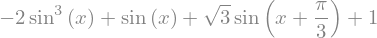

In [8]:
#We can simplify trig expressions!
expr = sym.cos(x)**2 + sym.sin(x)**2 + sym.cos(x) + sym.sin(x+sym.pi/6) + sym.cos(2*x)*sym.sin(x)
#Combine all trig functions
sym.trigsimp(expr)

We can also expand using the same identities.

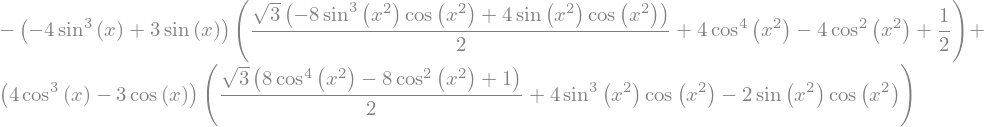

In [56]:
#We can also expand trig functions
expr = sym.cos(3*x + sym.pi/6 + 4*x**2)
sym.expand_trig(expr)

We have to be a little careful when working with powers. In general, the identities

$$ (xy)^n = x^ny^n $$

and 

$$ (x^n)^m $$

Might not work with all complex numbers (as values for $x,n,m$). As such, sympy might not simplify these fully unless we state assumptions about the symbols $x,y$.

In [71]:
expr = (x*y)**n
#We sometimes have to make assumptions to make sure the simplification works as desired. We can add these into the symbols function
x,y = sym.symbols('x y',positive=True,real=True)
sym.expand(expr)

Usually powsimp will simplify powers. This sometimes gives strange formats for the answer.

In [78]:
x,y, n, m = sym.symbols('x y n m',positive=True,real=True)
expr = ((x+y)**n * (x+y)**(n-1))**m
#Sometimes simplifies powers
sym.powsimp(expr)

We can use the function below to multiply through powers (assuming relevant assumptions are met)

In [10]:
x,y, n, m = sym.symbols('x y n m',positive=True,real=True)
expr = ((x+y)**n * (x+y)**(n-1))**m
#Multiplies in the powers if possible
sym.powdenest(expr)

This time, simplify made the right guess.

In [79]:
x,y, n, m = sym.symbols('x y n m',positive=True,real=True)
expr = ((x+y)**n * (x+y)**(n-1))**m
#Compare to simplify
sym.simplify(expr)

We can also simplify logarithms. Sympy defaults to using $\log$ for $\ln$. If we wish to expand the logarithms, we use the function below:

In [82]:
x,y, n, m = sym.symbols('x y n m',positive=True,real=True)
#In Sympy, log is ln
expr = sym.log(x*y*x**2) + sym.cos(x) + sym.sqrt(y)
#Expand the logs
sym.expand_log(expr)

If we wish to combine the logarithms, we use the function below:

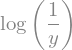

In [87]:
x,y, n, m = sym.symbols('x y n m',positive=True,real=True)
#In Sympy, log is ln
expr = 3*sym.log(x) + 2*sym.log(y) - 3*sym.log(x*y)
#Combine the logs
sym.logcombine(expr)

We can also use and simplify factorials and binomial coefficients.

In [92]:
#Simplification of combinatorial functions!
expr = sym.factorial(n) / sym.factorial(n-2)
sym.combsimp(expr)

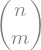

In [96]:
#It can simplify binomial coefficients!
n,m = sym.symbols('n m',positive=True, real=True, integer=True)
expr = sym.binomial(n-1,m-1) + sym.binomial(n-1,m)
sym.combsimp(expr)

We probably want a better method to represent sums symbolically.

In [98]:
n,m = sym.symbols('n m',positive=True, real=True, integer=True)
expr = 0
for i in range(13):
    expr = expr + sym.binomial(12,i)
expr